In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mall_customers = pd.read_csv('https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/Mall_Customers.csv')

In [3]:
mall_customers

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
mall_customers.shape

(200, 5)

In [5]:
# missing values
mall_customers.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#### EDA

In [6]:
mall_customers['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

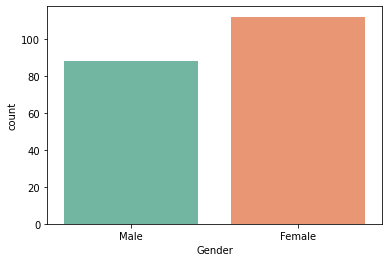

In [7]:
sns.countplot(x = 'Gender', data = mall_customers, palette = 'Set2')

#### Features

In [8]:
X = mall_customers.iloc[:, [3,4]]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


#### Elbow Method

In [9]:
from sklearn.cluster import KMeans

In [10]:
# Use Elbow method to find the optimum numbers of clusters (WCSS vs Values of K)
import warnings 
warnings.filterwarnings('ignore')
wcss = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    # .inertia_ gives wcss (Within Cluster Sum of Squares)
    wcss.append(kmeans.inertia_)

In [11]:
wcss

[269981.28,
 181363.59595959593,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37265.86520484347,
 30259.65720728547,
 25095.703209997548,
 21830.041978049438,
 20736.679938924124,
 17702.595932296277,
 15810.838613705502,
 14763.330402558204,
 13165.329070181626,
 12064.939000692291]

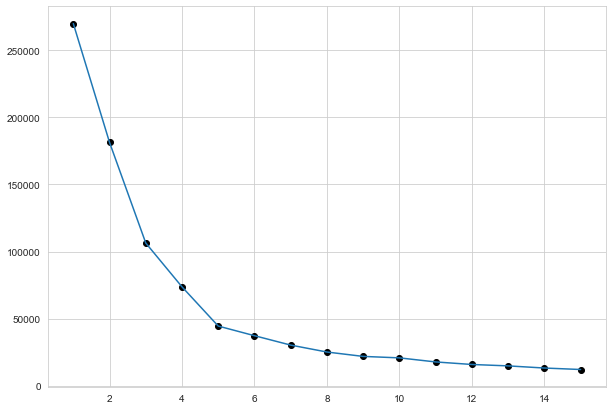

In [12]:
# Plot visualization b/w WCSS and Number of Clusters (K)
sns.set_style('whitegrid')
plt.figure(figsize = (10,7))
plt.plot(range(1,16), wcss)
plt.scatter(range(1,16), wcss, marker = 'o', color = 'k')

#### Optimum Value of K = 5

In [14]:
# k-means++ : selects initial cluster centres (centroid values/cluster means) for k-means clustering ,
# kmeans++ algorithm selects intial data points as clusters in smart way to speed-up convergence
# max_iter = Number of Iterations
# n_init = Number of time k-means algorithm will run with different centroids
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

In [15]:
kmeans.fit(X)

KMeans(n_clusters=5, random_state=0)

In [17]:
y_clusters = kmeans.predict(X)
y_clusters

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [18]:
kmeans.cluster_centers_

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

#### Cluster Visualization

In [19]:
y_clusters

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [29]:
cluster_df = pd.DataFrame(y_clusters).rename(columns = {0 : 'Cluster'})
cluster_df

,Cluster
0,4
1,3
2,4
3,3
4,4
...,...
195,2
196,0
197,2
198,0


In [32]:
x_cluster = pd.concat([X,cluster_df], axis = 1)
x_cluster

,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4
...,...,...,...
195,120,79,2
196,126,28,0
197,126,74,2
198,137,18,0


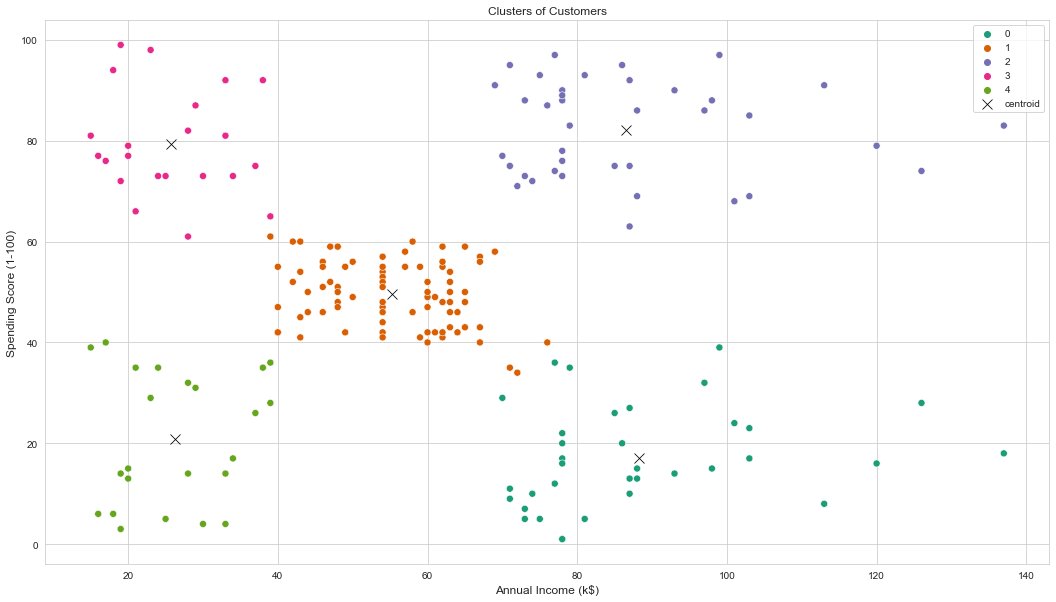

In [43]:
plt.figure(figsize = (18,10))
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = 'Cluster', data = x_cluster, s = 50,
               palette = 'Dark2')
sns.scatterplot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker = 'x', color = 'black', s = 100, label = 'centroid')
plt.title('Clusters of Customers', size = 12)
plt.xlabel('Annual Income (k$)', size = 12)
plt.ylabel('Spending Score (1-100)', size = 12) 
plt.show()

#### Hierarchical Clustering

In [48]:
from seaborn.matrix import dendrogram
import scipy.cluster.hierarchy as sch

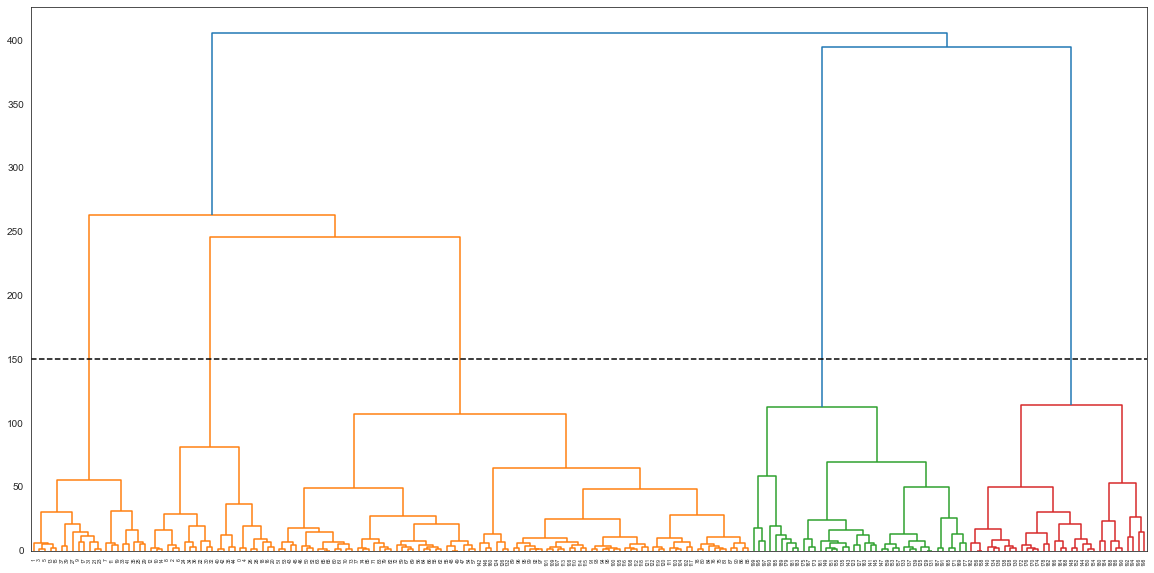

In [51]:
sns.set_style('white')
fig = plt.figure(figsize = (20,10))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.axhline(150, linestyle = '--', color = 'black')
plt.show()

In [52]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')

In [53]:
y_hc = hc.fit_predict(X)

In [54]:
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [56]:
cluster_df1 = pd.DataFrame(y_hc).rename(columns = {0 : 'Cluster'})
cluster_df1

,Cluster
0,4
1,3
2,4
3,3
4,4
...,...
195,2
196,0
197,2
198,0


In [57]:
x_cluster2 = pd.concat([X,cluster_df1], axis = 1)
x_cluster2

,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4
...,...,...,...
195,120,79,2
196,126,28,0
197,126,74,2
198,137,18,0


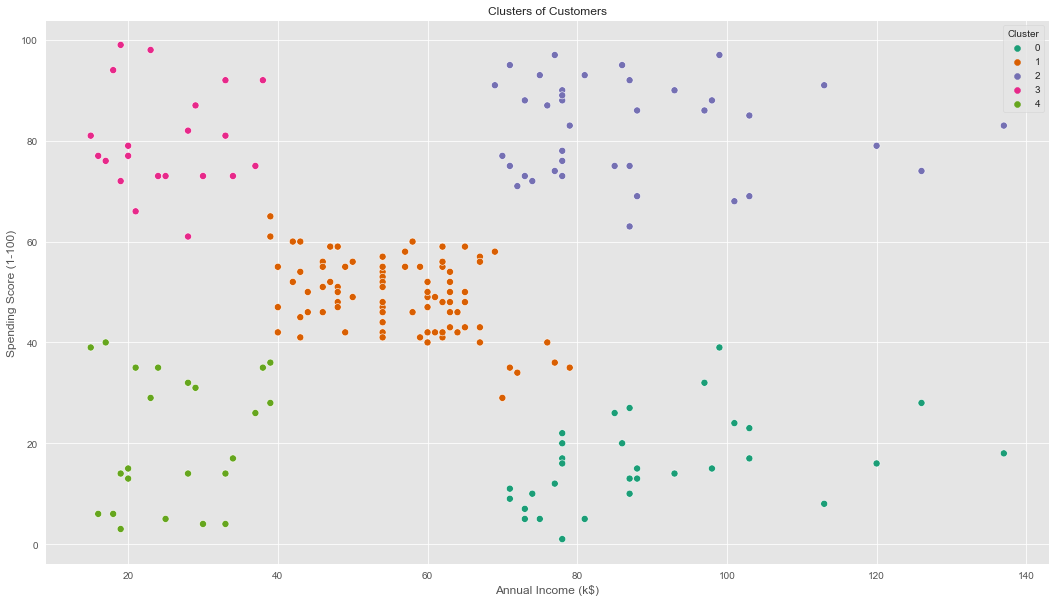

In [58]:
plt.figure(figsize = (18,10))
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = 'Cluster', data = x_cluster2, s = 50,
               palette = 'Dark2')
plt.title('Clusters of Customers', size = 12)
plt.xlabel('Annual Income (k$)', size = 12)
plt.ylabel('Spending Score (1-100)', size = 12) 
plt.show()